In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.metrics import *
from sklearn.model_selection import *

In [14]:
df = pd.read_csv('train_dec04_task2.csv') #讀入訓練資料
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,class
0,8.617386,1.935144,25.212971,20.648995,25.370660,32.910968,29.867382,A
1,9.323783,7.978308,28.416780,11.173499,30.017304,40.937199,28.534810,A
2,9.217229,5.086806,9.891921,10.838714,26.422005,38.131975,26.656291,A
3,5.809597,7.846847,28.956052,10.231720,19.639815,32.219978,20.905991,A
4,9.027168,7.775159,25.476313,23.714593,23.993034,32.996477,37.529698,A


In [15]:
df.shape

(4500, 8)

In [16]:
y = df['class'] #訓練資料的分類結果
X = df.drop('class', axis = 1) #X中留下features
X.shape

(4500, 7)

B    2000
C    1500
A    1000
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

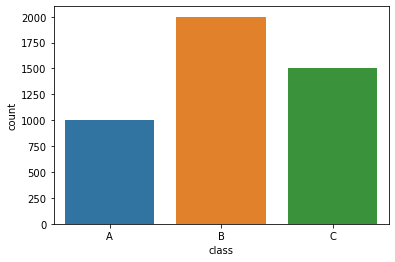

In [17]:
#查看三種分類分別的數量(這裡會發現資料imbalance)
print(y.value_counts())
sns.countplot(x = y)

1    2000
2    1500
0    1000
Name: class, dtype: int64


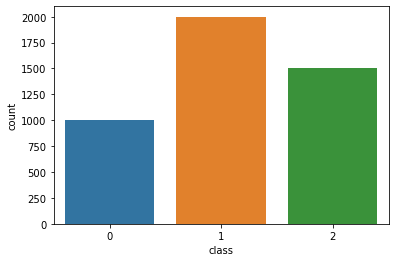

In [19]:
y[0:1000] = 0
y[1000:3000] = 1
y[3000:4500] = 2
print(y.value_counts())
sns.countplot(x = y)
y = y.astype('int64')

In [20]:
#用上採樣(OverSampling)處理imbalance資料
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)
X.shape

(6000, 7)

0    2000
1    2000
2    2000
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

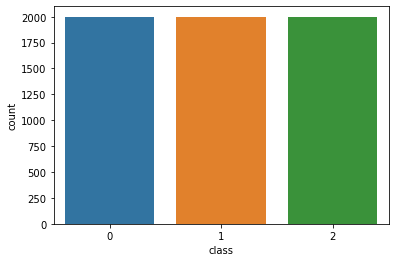

In [21]:
#確認三個分類在上採樣後確實資料數量一致
print(y.value_counts())
sns.countplot(x = y)

In [22]:
#訓練資料分割成0.85訓練、0.15測試
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.85, test_size=0.15)

In [23]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X1, y1)
# 使用訓練資料預測分類
predicted1 = xgboostModel.predict(X2)

print(accuracy_score(y2, predicted1))

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:48:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8477777777777777


In [25]:
df_test = pd.read_csv('test_dec04_task2_only_features.csv') #讀入測試資料

In [29]:
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X, y)
# 使用訓練資料預測分類
predicted_final = xgboostModel.predict(df_test)

print(predicted_final)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:49:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 0 0 ... 1 2 1]


In [30]:
import csv

In [31]:
with open('output_1216.csv', 'w', newline='') as csvfile:
  
    writer = csv.writer(csvfile)

    writer.writerow(['Id', 'Category'])

    for i in range(len(predicted_final)):
        if predicted_final[i] == 0:
            writer.writerow([i + 1, 'A'])
        elif predicted_final[i] == 1:
            writer.writerow([i + 1, 'B'])
        elif predicted_final[i] == 2:
            writer.writerow([i + 1, 'C'])